In [1]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
from folium import Choropleth
import matplotlib
from datetime import datetime 
# GetCompasData로 주피터 노트북 경로에 파일 저장
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from fiona.crs import from_string
matplotlib.rcParams['font.family']="Malgun Gothic"

In [2]:
# 선용=pd.read_csv("전처리완료_선용.csv")
# 나연=pd.read_csv("전처리완료_나연.csv")
# df=pd.merge(선용, 나연, how='inner', on='관할경찰서')
# df.to_csv("4개시도_전처리완료.csv", index=False)
# df

In [3]:
# 데이터
df=gpd.read_file("테스트.geojson",driver="GeoJSON")
df.reset_index()
df.fillna(0)
df

,gid,상업지역면적,공업지역면적,주거지역면적,녹지지역면적,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,노숙인자활시설_격자별개수,...,공동주거건축물비율,사고다발지역,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적,rep_cnt,geometry
0,다사49aa19ab,0.0,0.0,0.0,1.533091e-06,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92477 37.27077, 126.92475 ..."
1,다사49aa19ba,0.0,0.0,0.0,2.217984e-07,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92475 37.27302, 126.92473 ..."
2,다사49aa20aa,0.0,0.0,0.0,1.536883e-07,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92472 37.27753, 126.92470 ..."
3,다사49ab18ab,0.0,0.0,0.0,6.017091e-07,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92766 37.26177, 126.92764 ..."
4,다사49ab18ba,0.0,0.0,0.0,3.456896e-06,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((126.92764 37.26402, 126.92762 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,다사63ba21aa,0.0,0.0,0.0,1.206657e-06,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08822 37.28722, 127.08821 ..."
2086,다사63ba21ab,0.0,0.0,0.0,9.069994e-08,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08821 37.28947, 127.08820 ..."
2087,다사63ba21ba,0.0,0.0,0.0,7.868796e-07,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,"MULTIPOLYGON (((127.08820 37.29173, 127.08819 ..."
2088,다사63ba21bb,0.0,0.0,0.0,2.346309e-06,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,6.374772e-08,0.0,0.0,0,"MULTIPOLYGON (((127.08819 37.29398, 127.08818 ..."


In [4]:
X=df.drop(['gid'], axis=1)
y=pd.DataFrame(df.loc[:, 'rep_cnt'])

In [5]:
#suwon_grid = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')

In [6]:
# # 신고데이터를 y로 합체
# suwon_112_group=suwon_112.groupby(['psname']).count()
# suwon_112_group=pd.DataFrame(suwon_112_group['case_type'])
# suwon_112_group.rename(columns={'case_type':'cnt'}, inplace=True)
# suwon_112_group.reset_index(inplace=True)

# others_112_group=others_112.groupby(['psname']).count()
# others_112_group=pd.DataFrame(others_112_group['case_type'])
# others_112_group.rename(columns={'case_type':'cnt'}, inplace=True)
# others_112_group.reset_index(inplace=True)


# df_y=pd.concat([suwon_112_group, others_112_group], axis=0)
# df_y.sort_values(by='psname', inplace=True)
# df_y.rename(columns={'psname':'관할경찰서', 'cnt':'신고건수'}, inplace=True)
# df_y.reset_index(inplace=True)
# df_y.drop(['index'],axis=1, inplace=True)
# df_y

In [7]:
from geoband.API import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json
import geopandas as gpd
import os
import pydeck as pdk
import shapefile

In [8]:
#변수선택법

import time
import itertools

#회귀분석

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#공간회귀분석

import pysal
import libpysal
from esda.moran import Moran
from esda.moran import Moran_Local
from libpysal.weights import Queen, Rook, KNN, DistanceBand, Kernel
from esda.getisord import G
from esda.moran import Moran
from spreg import OLS, ML_Lag, ML_Error, GM_Lag, GM_Error, TSLS

#정규성검정

from scipy.stats import shapiro

#다중공선성 체크

from statsmodels.stats.outliers_influence import variance_inflation_factor


#지리적가중회귀분석

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap


In [9]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [10]:
#전진선택법

def forward(X,y,predictors):

    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()] #AIC가 가장 낮은 모델을 선택
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
#전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
     
    predictors = []
    
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [11]:
#후진제거법

def backward(X,y,predictors):
    tic= time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]    # 가장 낮은 AIC를 가진 모델을 선택
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model
    
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=X, y= y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return Bmodels["model"].dropna().iloc[0]

In [12]:
#변수선택법

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

## 시작

In [13]:
X=df.drop(['gid', 'geometry', 'rep_cnt'], axis=1)
X.fillna(0, inplace=True)
y=pd.DataFrame(df.loc[:, 'rep_cnt'])

In [14]:
X.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 87 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   상업지역면적            2090 non-null   float64
 1   공업지역면적            2090 non-null   float64
 2   주거지역면적            2090 non-null   float64
 3   녹지지역면적            2090 non-null   float64
 4   여성안심택배함_격자별개수     2090 non-null   float64
 5   편의점_격자별개수         2090 non-null   float64
 6   공원_격자별개수          2090 non-null   float64
 7   안전비상벨_격자별개수       2090 non-null   float64
 8   노숙인자활시설_격자별개수     2090 non-null   float64
 9   아동복지시설_격자별개수      2090 non-null   float64
 10  지역아동센터시설_격자별개수    2090 non-null   float64
 11  청소년공부방_격자별개수      2090 non-null   float64
 12  도서관_격자별개수         2090 non-null   float64
 13  무료급식소_격자별개수       2090 non-null   float64
 14  어린이놀이시설_격자별개수     2090 non-null   float64
 15  가로등_격자별개수         2090 non-null   float64
 16  유흥업소_격자별개수        2090 non-null   

In [15]:
#전체 독립변수를 대상으로 다중공선성 확인

vif_acc_risk = pd.DataFrame()
vif_acc_risk['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_acc_risk['features'] = X.columns
vif_acc_risk

,VIF Factor,features
0,2.720719,상업지역면적
1,1.712545,공업지역면적
2,7.119867,주거지역면적
3,2.038417,녹지지역면적
4,1.097865,여성안심택배함_격자별개수
...,...,...
82,1.757813,치안센터_Buffer면적
83,354.195829,보안등_Buffer면적
84,1426.205228,가로등_Buffer면적
85,15.310268,CCTV_Buffer면적


In [16]:
vif_acc_risk[vif_acc_risk['VIF Factor']<=10]

,VIF Factor,features
0,2.720719,상업지역면적
1,1.712545,공업지역면적
2,7.119867,주거지역면적
3,2.038417,녹지지역면적
4,1.097865,여성안심택배함_격자별개수
5,2.888129,편의점_격자별개수
6,1.470777,공원_격자별개수
7,1.348661,안전비상벨_격자별개수
8,1.047933,노숙인자활시설_격자별개수
9,1.112421,아동복지시설_격자별개수


## -> 노답이라 일단 변수선택부터!

In [17]:
#독립변수들의 계수의 크기를 명확히 비교하기 위해 독립변수를 대상으로 Min-Max scaling 진행

scaler = MinMaxScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

scaled_X = pd.DataFrame(scaled_X)
scaled_X.columns = list(X.columns)

scaled_X = sm.add_constant(scaled_X, has_constant='add')

scaled_X

,const,상업지역면적,공업지역면적,주거지역면적,녹지지역면적,여성안심택배함_격자별개수,편의점_격자별개수,공원_격자별개수,안전비상벨_격자별개수,노숙인자활시설_격자별개수,...,30년이상건축물비율,단독주거건축물비율,공동주거건축물비율,사고다발지역,경찰서_Buffer면적,치안센터_Buffer면적,보안등_Buffer면적,가로등_Buffer면적,CCTV_Buffer면적,유흥업소_Buffer면적
0,1.0,0.0,0.0,0.0,0.120595,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,1.0,0.0,0.0,0.0,0.017447,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,1.0,0.0,0.0,0.0,0.012089,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,1.0,0.0,0.0,0.0,0.047331,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,1.0,0.0,0.0,0.0,0.271925,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,1.0,0.0,0.0,0.0,0.094917,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2086,1.0,0.0,0.0,0.0,0.007135,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2087,1.0,0.0,0.0,0.0,0.061897,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2088,1.0,0.0,0.0,0.0,0.184564,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01522,0.0,0.0


In [18]:
step_best_model_ctc = Stepwise_model(scaled_X, y)

Processed  87 models on 1 predictors in 0.15548133850097656
Selected predictors: ['편의점_격자별개수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f2ae21db3c8>
forward
Processed  1 models on 0 predictors in 0.0031621456146240234
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f2ae6269cc0>
Processed  86 models on 2 predictors in 0.1296098232269287
Selected predictors: ['편의점_격자별개수', '경찰서_치안센터_격자별개수', 'const'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f2ae2223470>
forward
Processed  2 models on 1 predictors in 0.005873441696166992
Selected predictors: ['편의점_격자별개수', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f2ae2223ef0>
Processed  85 models on 3 predictors in 0.17811012268066406
Selected predictors: ['편의점_격자별개수', '경찰서_치안센터_격자별개수', '유흥업소_Buffer면적', 'const'] AIC:  <statsmodels.regression.linear_model.Regre

In [19]:
step_best_model_ctc.summary()
## P>|t|가 0.05보다 크면 별로인 것

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rep_cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     148.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:08:52   Log-Likelihood:                -13079.
No. Observations:                2090   AIC:                         2.625e+04
Df Residuals:                    2042   BIC:                         2.652e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
편의점_격자별개수          292.6928     42.170      6.941      0.000     209.991     375.394
경찰서_치안센터_격자별개수     693.5817     25.489     27.211      0.000     643.595     743.568
유흥업소_Buffer면적      720.8038     61.705     11.682      0.000     599.793     841.814
상업지역면적             136.1870     24.143      5.641      0.000      88.840     183.535
사고다발지역             394.4289     40.406      9.762      0.000     315.188     473.670
총건축물수              900.0181    110.743      8.127      0.000     682.836    1117.200
단독주거건축물          -1083.5536    101.723    -10.652      0.000   -1283.046    -884.061
공동주거건축물           -338.0893     57.929     -5.836      0.000    -451.696    -224.482
고령자수               263.4143     65.119      4.045      0.000     135.708     391.120
여자유동인구수_20대_수치    5421.4672    685.999      7.903      0.000    4076.137    6766.797
무료급식소_격자별개수      -1685.2978    323.512     -5.209      0.000   -2319.746   -1050.850
여자유동인구수_40대_수치   -2606.5305    559.230     -4.661      0.000   -3703.252   -1509.809
22시기준_측정정보        4391.7731   1111.711      3.950      0.000    2211.568    6571.979
30년이상건축물비율        -263.5835     85.299     -3.090      0.002    -430.865     -96.302
8시기준_측정정보        -4977.2103    865.577     -5.750      0.000   -6674.717   -3279.704
남자유동인구수_10대_수치    -934.0783    208.959     -4.470      0.000   -1343.873    -524.283
가로등_Buffer면적       -91.8564     36.380     -2.525      0.012    -163.202     -20.510
보안등_격자별개수         -922.6786    441.343     -2.091      0.037   -1788.208     -57.149
35년이상건축물수          339.5641     69.577      4.880      0.000     203.115     476.013
여자유동인구수_60대이상_수치 -3294.7364    688.897     -4.783      0.000   -4645.750   -1943.723
여자유동인구수_30대_수치   -3150.5308    567.111     -5.555      0.000   -4262.706   -2038.355
1시기준_측정정보         1992.4903    743.651      2.679      0.007     534.096    3450.885
23시기준_측정정보       -4090.3323    940.735     -4.348      0.000   -5935.232   -2245.433
4시기준_측정정보        -3878.5642    696.468     -5.569      0.000   -5244.425   -2512.703
2시기준_측정정보         4427.1272    935.435      4.733      0.000    2592.621    6261.633
남자유동인구수_60대이상_수치  2588.6449    971.993      2.663      0.008     682.443    4494.847
20시기준_측정정보       -5380.2696   1512.450     -3.557      0.000   -8346.376   -2414.163
19시기준_측정정보        6232.6656   1543.570      4.038      0.000    3205.530    9259.801
남자유동인구수_50대_수치   -2855.2506    934.286     -3.056      0.002   -4687.504   -1022.997
12시기준_측정정보       -1340.6822    612.911     -2.187      0.029   -2542.679    -138.685
금요일유동인구           1.435e+04   3503.216      4.096      0.000    7477.588    2.12e+04
16시기준_측정정보       -1.344e+04   2497.551     -5.381      0.000   -1.83e+04   -8540.729
15시기준_측정정보        1.475e+04   2581.735      5.714      0.000    9689.366    1.98e+04
수요일유동인구           -1.89

In [20]:
#OLS모형을 적합하는 과정을 함수로 정의

def ols(data_x, data_y, w_matrix):
    x = np.array(data_x)
    y = np.array(data_y)
    
    name_x = list(data_x.columns)
    name_y = list(data_y.columns)
    
    ols = OLS(y = y, x = x, w = w_matrix, name_x = name_x, name_y = name_y, white_test = True, spat_diag = True, moran = True)
    
    print(ols.summary)
    
    return ols

In [21]:
#SEM_GM모형을 적합하는 과정을 함수로 정의

def gmerror(data_x, data_y, w_matrix):
    x = np.array(data_x)
    y = np.array(data_y)
    
    name_x = list(data_x.columns)
    name_y = list(data_y.columns)
    
    gmerror = GM_Error(y = y, x = x, w = w_matrix, name_x = name_x, name_y = name_y)
    
    print(gmerror.summary)
    
    return gmerror

In [22]:
#SEM_ML모형을 적합하는 과정을 함수로 정의

def mlerror(data_x, data_y, w_matrix):
    x = np.array(data_x)
    y = np.array(data_y)
    
    name_x = list(data_x.columns)
    name_y = list(data_y.columns)
    
    mlerror = ML_Error(y = y, x = x, w = w_matrix, name_x = name_x, name_y = name_y)
    stat_Q_risk, p_Q_risk = shapiro(mlerror.e_filtered)
    
    print(stat_Q_risk, p_Q_risk)
    print(mlerror.summary)
    
    return mlerror

In [23]:
#SLM_GM모형을 적합하는 과정을 함수로 정의

def gmlag(data_x, data_y, w_matrix):
    x = np.array(data_x)
    y = np.array(data_y)
    
    name_x = list(data_x.columns)
    name_y = list(data_y.columns)
    
    gmlag = GM_Lag(y = y, x = x, w = w_matrix, name_x = name_x)
    
    print(gmlag.summary)
    
    return gmlag

In [24]:
#SLM_ML모형을 적합하는 과정을 함수로 정의

def mllag(data_x, data_y, w_matrix):
    x = np.array(data_x)
    y = np.array(data_y)
    
    name_x = list(data_x.columns)
    name_y = list(data_y.columns)
    
    mllag = ML_Lag(y = y, x = x, w = w_matrix, name_x = name_x)
    
    print(mllag.summary)
    
    return mllag

In [25]:
# 정규성 검정
shapiro(y)

ShapiroResult(statistic=0.39868927001953125, pvalue=0.0)

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [28]:
gdf = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
gdf = gpd.GeoDataFrame(gdf, geometry=gdf.geometry)

In [29]:
w = Queen.from_dataframe(gdf)
w.transform = 'r'

## 여기부턴 
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html

### 0에 가까울수록 값은 무작위(CSR)로 분포

In [30]:
from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

0.4639155681963931

In [31]:
from splot.esda import moran_scatterplot

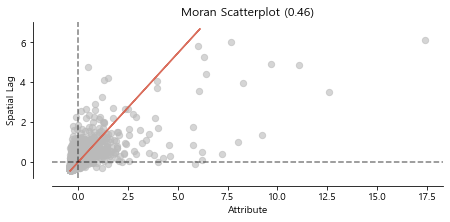

In [32]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

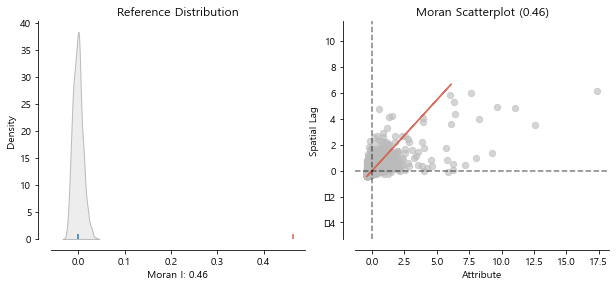

In [33]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [34]:
moran.p_sim

0.001

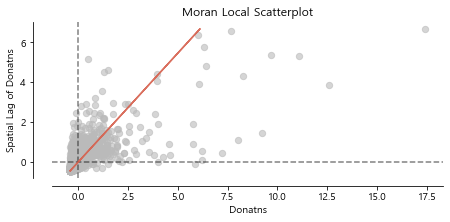

In [35]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

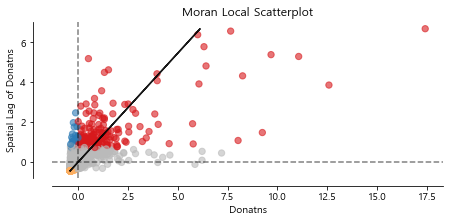

In [36]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()

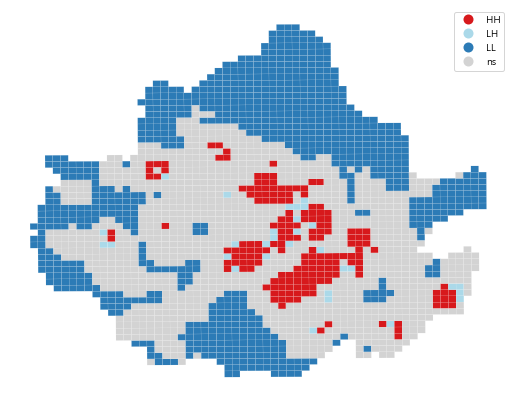

In [37]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

## 잠시 대기

In [38]:
#y_df=pd.DataFrame(df_y['신고건수'])

In [39]:
#scaled_X.drop(['const'], axis=1, inplace=True)

In [40]:
scaled_X.shape

(2090, 88)

In [41]:
y.shape

(2090, 1)

In [42]:
#half_X=scaled_X.iloc[:, :20]

In [43]:
ols_Q_ctc = ols(scaled_X, y, w)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : ['rep_cnt']                Number of Observations:        2090
Mean dependent var  :    107.0641                Number of Variables   :          88
S.D. dependent var  :    265.4280                Degrees of Freedom    :        2002
R-squared           :      0.7765
Adjusted R-squared  :      0.7667
Sum squared residual:32899308.792                F-statistic           :     79.9299
Sigma-square        :   16433.221                Prob(F-statistic)     :           0
S.E. of regression  :     128.192                Log likelihood        :  -13064.506
Sigma-square ML     :   15741.296                Akaike info criterion :   26305.013
S.E of regression ML:    125.4643                Schwarz criterion     :   26801.766

-----------------------------------------------------------------------------

In [44]:
gmerror_Q_ctc = gmerror(scaled_X, y, w) #GMM 추정

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  : ['rep_cnt']                Number of Observations:        2090
Mean dependent var  :    107.0641                Number of Variables   :          88
S.D. dependent var  :    265.4280                Degrees of Freedom    :        2002
Pseudo R-squared    :      0.7741

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      -1.0582140      10.8818531      -0.0972458       0.9225312
              상업지역면적     135.9131643      29.8153690       4.5584935       0.0000052
              공업지역면적     -42.3931039      27.5108726      -1.5409582       0.1233270
      

In [45]:
gmlag_D_cth = gmlag(scaled_X, y, w) #2SLS 추정

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        2090
Mean dependent var  :    107.0641                Number of Variables   :          89
S.D. dependent var  :    265.4280                Degrees of Freedom    :        2001
Pseudo R-squared    :      0.7972
Spatial Pseudo R-squared:  0.7794

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT     -10.7622359       8.5886320      -1.2530792       0.2101769
              상업지역면적      65.7533993      27.0781130       2.4282859       0.0151704
              공업지역면적     -25.5790961      21.8604105      -

In [46]:
#전역적 Moran's I

mi = Moran(y, w)
mi.I, mi.p_sim

(0.4639155681963931, 0.001)

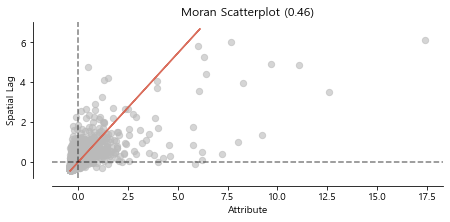

In [47]:
fig, ax = moran_scatterplot(mi, aspect_equal=True)
plt.show()

In [48]:
#지역적 Moran's I

mil = Moran_Local(y, w)
mil.Is.shape

(2090,)

In [ ]:
mil.I, mil.p_sim

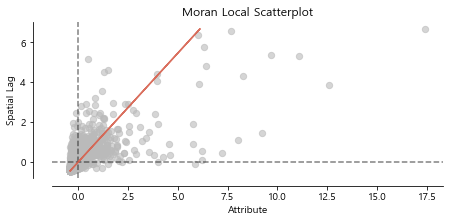

In [49]:
fig, ax = moran_scatterplot(mil, aspect_equal=True)
plt.show()

In [50]:
idx = mil.p_sim < 0.05
mil.p_sim[idx]

array([0.004, 0.004, 0.026, 0.004, 0.003, 0.003, 0.001, 0.001, 0.007,
       0.007, 0.006, 0.001, 0.003, 0.004, 0.004, 0.001, 0.001, 0.001,
       0.001, 0.007, 0.01 , 0.001, 0.001, 0.001, 0.001, 0.006, 0.004,
       0.026, 0.004, 0.001, 0.001, 0.001, 0.001, 0.038, 0.024, 0.001,
       0.002, 0.001, 0.005, 0.043, 0.01 , 0.001, 0.01 , 0.003, 0.001,
       0.001, 0.002, 0.01 , 0.049, 0.007, 0.007, 0.007, 0.044, 0.003,
       0.001, 0.024, 0.003, 0.001, 0.004, 0.004, 0.04 , 0.005, 0.007,
       0.009, 0.026, 0.002, 0.001, 0.004, 0.001, 0.005, 0.004, 0.035,
       0.043, 0.005, 0.018, 0.018, 0.029, 0.001, 0.005, 0.008, 0.005,
       0.046, 0.035, 0.002, 0.009, 0.006, 0.009, 0.001, 0.008, 0.008,
       0.049, 0.045, 0.036, 0.014, 0.019, 0.027, 0.043, 0.034, 0.033,
       0.006, 0.006, 0.039, 0.004, 0.002, 0.001, 0.028, 0.031, 0.004,
       0.004, 0.006, 0.032, 0.044, 0.015, 0.001, 0.001, 0.001, 0.021,
       0.042, 0.032, 0.005, 0.005, 0.006, 0.033, 0.049, 0.014, 0.001,
       0.011, 0.016,

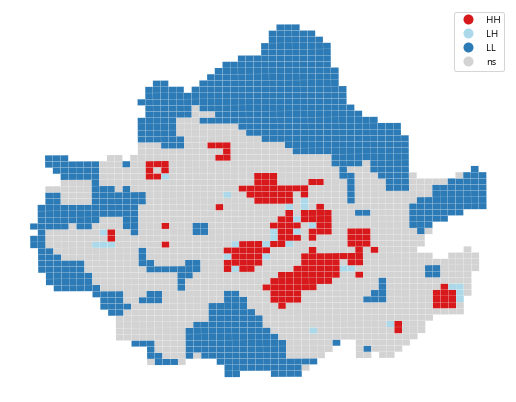

In [51]:
lisa_cluster(mil, gdf, p=0.05, figsize = (9,9))
plt.show()

In [52]:
sum(mil.q[idx] == 1), sum(mil.q[idx] == 2), sum(mil.q[idx] == 3), sum(mil.q[idx] == 4)

(175, 28, 795, 0)

In [53]:
#변수들의 데이터타입 변경

X_a = np.array(scaled_X)

y_a = np.array(y).reshape(-1,1)


In [54]:
gdf['geometry']

0       MULTIPOLYGON (((126.92477 37.27077, 126.92475 ...
1       MULTIPOLYGON (((126.92475 37.27302, 126.92473 ...
2       MULTIPOLYGON (((126.92472 37.27753, 126.92470 ...
3       MULTIPOLYGON (((126.92766 37.26177, 126.92764 ...
4       MULTIPOLYGON (((126.92764 37.26402, 126.92762 ...
                              ...                        
2085    MULTIPOLYGON (((127.08822 37.28722, 127.08821 ...
2086    MULTIPOLYGON (((127.08821 37.28947, 127.08820 ...
2087    MULTIPOLYGON (((127.08820 37.29173, 127.08819 ...
2088    MULTIPOLYGON (((127.08819 37.29398, 127.08818 ...
2089    MULTIPOLYGON (((127.08818 37.29624, 127.08816 ...
Name: geometry, Length: 2090, dtype: geometry

In [55]:
#격자의 centroid값 저장

#gdf = gpd.GeoDataFrame(gdf, geometry=gdf.geometry)

g_coords = gdf['geometry'].centroid

x_g = g_coords.x
y_g = g_coords.y

g_coords = list(zip(x_g, y_g))

In [56]:
# GWR 분석 결과

gwr_selector_ctc = Sel_BW(g_coords, y_a, X_a, kernel='gaussian')
gwr_bw_ctc = gwr_selector_ctc.search()#bw_min=2)

In [57]:
gwr_model_ctc = GWR(g_coords, y_a, X_a, gwr_bw_ctc, fixed=False, kernel='gaussian')
gwr_result_ctc = gwr_model_ctc.fit()
gwr_result_ctc.summary()

Model type                                                         Gaussian
Number of observations:                                                2090
Number of covariates:                                                    88

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       32899308.792
Log-likelihood:                                                  -13064.506
AIC:                                                              26305.013
AICc:                                                             26315.023
BIC:                                                           32884003.664
R2:                                                                   0.776
Adj. R2:                                                              0.767

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [58]:
pd.DataFrame(gwr_result_ctc.y_bar).to_csv('pred_ctc.csv')

[Text(0, 1, 'gwr_ctc')]

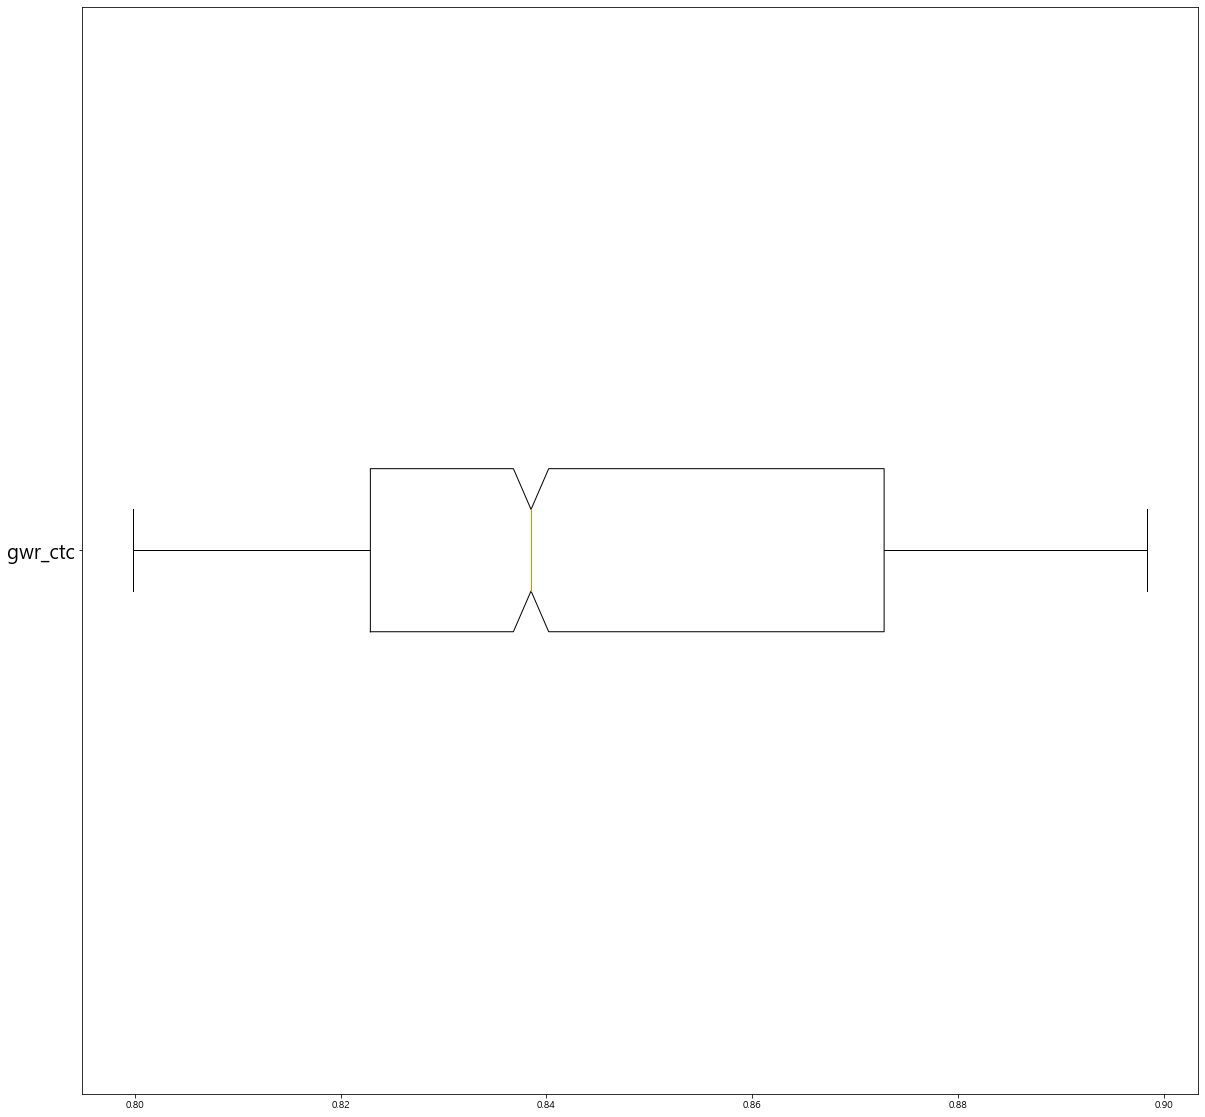

In [59]:
#모델별 R2 분포 확인

plt.figure(figsize=(20, 20))
plt.boxplot([gwr_result_ctc.localR2.reshape(-1,)],
            vert=False, notch=True, sym="")
plt.gca().set_yticklabels(['gwr_ctc'],
                          rotation=0, fontsize=20)

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (88).

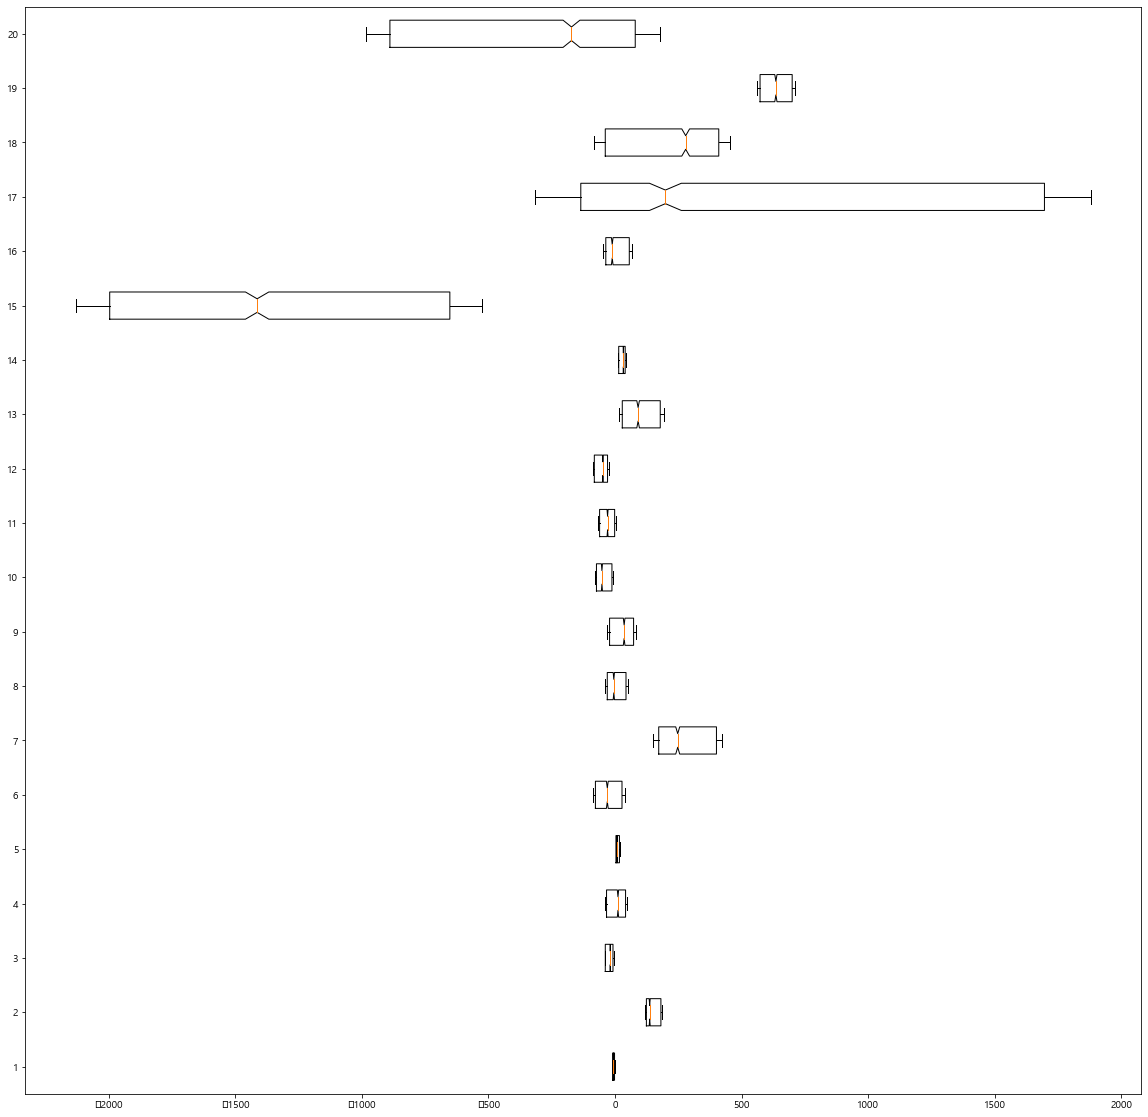

In [60]:
#차대차 사고의 변수계수 분포

plt.figure(figsize=(20, 20))

plt.boxplot(
    [gwr_result_ctc.params[:,0], gwr_result_ctc.params[:,1], gwr_result_ctc.params[:,2], gwr_result_ctc.params[:,3],
     gwr_result_ctc.params[:,4], gwr_result_ctc.params[:,5], gwr_result_ctc.params[:,6], gwr_result_ctc.params[:,7],
     gwr_result_ctc.params[:,8], gwr_result_ctc.params[:,9], gwr_result_ctc.params[:,10], gwr_result_ctc.params[:,11],
     gwr_result_ctc.params[:,12], gwr_result_ctc.params[:,13], gwr_result_ctc.params[:,14], gwr_result_ctc.params[:,15],
     gwr_result_ctc.params[:,16], gwr_result_ctc.params[:,17], gwr_result_ctc.params[:,18], gwr_result_ctc.params[:,19],],
    vert=False,
    notch=True,
    sym="",
    whis=0.1)

plt.gca().set_yticklabels(list(scaled_X.columns),
                          rotation=0, fontsize=20)

plt.axvline(0, 0, 1, color='grey', linewidth='1')

In [ ]:
gwr_result_ctc.params

In [ ]:
gwr_result_ctc.params